In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
test = pd.read_csv('titanic_test.csv')

<AxesSubplot:>

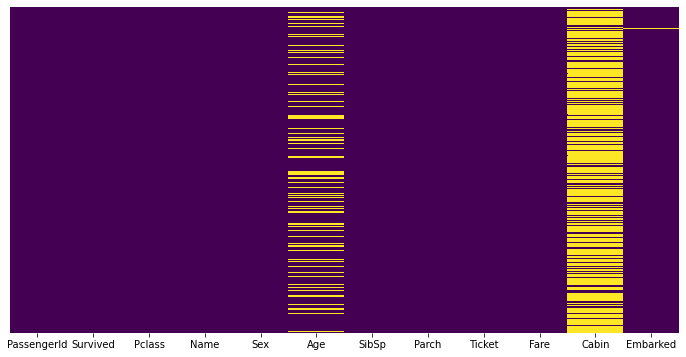

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

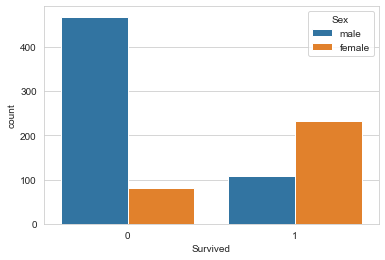

In [6]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

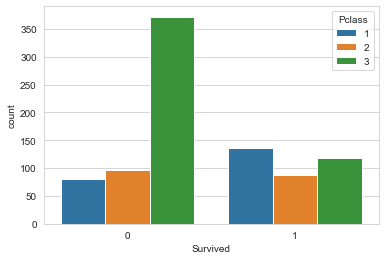

In [7]:
sns.countplot(x='Survived',data=train,hue='Pclass')

<AxesSubplot:>

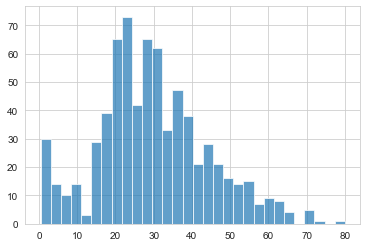

In [8]:
train['Age'].hist(bins=30,alpha=0.7)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

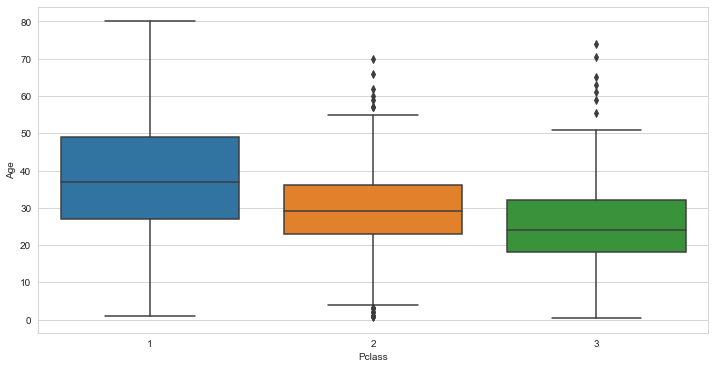

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [10]:
def input_idade(cols): #media de acordo com o boxplot
    Idade=cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Idade):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Idade

In [11]:
train['Age'] = train[['Age','Pclass']].apply(input_idade,axis=1)

<AxesSubplot:>

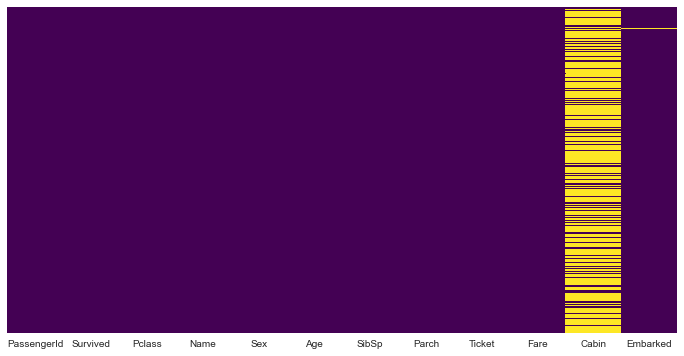

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
del train['Cabin']

In [14]:
train.dropna(inplace=True)

In [15]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [16]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [17]:
train.drop(['Sex','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [18]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S
887,1,1,19.0,0,0,30.0000,S
888,0,3,24.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [19]:
train= pd.concat([train,sex,embarked],axis=1)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1,0,1
887,1,1,19.0,0,0,30.0000,S,0,0,1
888,0,3,24.0,1,2,23.4500,S,0,0,1
889,1,1,26.0,0,0,30.0000,C,1,0,0


In [20]:
del train['Embarked']
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

<AxesSubplot:>

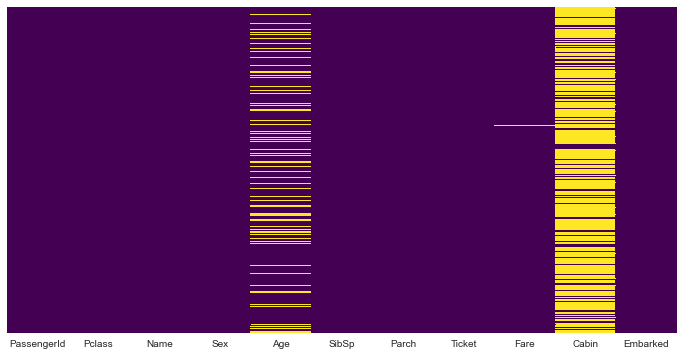

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
test['Age'] = test[['Age','Pclass']].apply(input_idade,axis=1)

In [24]:
del test['Cabin']

In [25]:
test.dropna(inplace=True)

In [26]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


In [27]:
embarked_test=pd.get_dummies(test['Embarked'],drop_first=True)

In [28]:
sex_test=pd.get_dummies(test['Sex'],drop_first=True)

In [29]:
test.drop(['Sex','PassengerId','Name','Embarked','Ticket'],axis=1,inplace=True)

In [30]:
test= pd.concat([test,sex_test,embarked_test],axis=1)
test.head(10)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
5,3,14.0,0,0,9.2250,1,0,1
6,3,30.0,0,0,7.6292,0,1,0
7,2,26.0,1,1,29.0000,1,0,1
8,3,18.0,0,0,7.2292,0,0,0
9,3,21.0,2,0,24.1500,1,0,1


In [34]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3)

In [38]:
logmodel=LogisticRegression(max_iter=200)

In [39]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [40]:
predictions = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       164
           1       0.78      0.68      0.73       103

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



In [45]:
print(confusion_matrix(y_test,predictions))

[[144  20]
 [ 33  70]]
